In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set(style="darkgrid")

from warnings import filterwarnings
filterwarnings(action='ignore')

In [54]:
wine_data = pd.read_csv('QualityPrediction.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Exploration

In [55]:
print(f'Shape of dataset : {wine_data.shape}')
print(f'The total number of rows : {wine_data.shape[0]}')
print(f'The total number of columns : {wine_data.shape[1]}')

Shape of dataset : (1599, 12)
The total number of rows : 1599
The total number of columns : 12


In [56]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### statistical data description

In [57]:
display(wine_data.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### checking for null values

In [58]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [59]:
wine_data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


#### renaming column names

In [60]:
wine_data.rename(columns = {'fixed acidity': 'fixed_acidity', 'volatile acidity' : 'volatile_acidity',
                  'citric acid' : 'citric_acid', 'residual sugar' : 'residual_sugar',
                  'free sulfur dioxide':'free_sulfur_dioxide', 
                  'total sulfur dioxide':'total_sulfur_dioxide'
                 }, inplace=True)

In [61]:
wine_data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Data Analysis

## Histogram

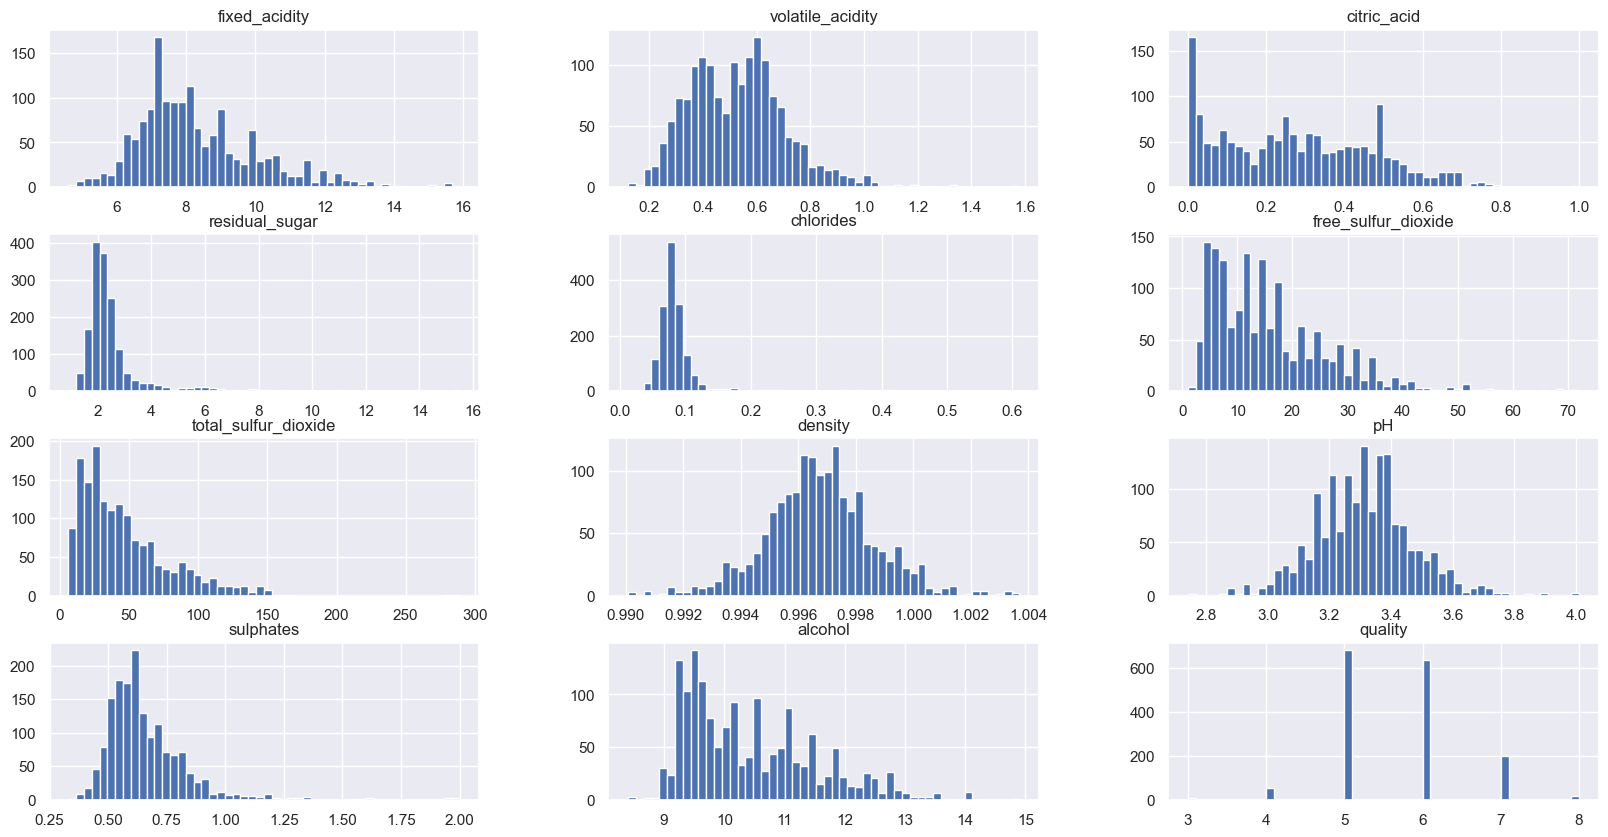

In [62]:
wine_data.hist(figsize=(20, 10), bins=50)
plt.show()

In [63]:
# wine quality

<Axes: xlabel='quality', ylabel='count'>

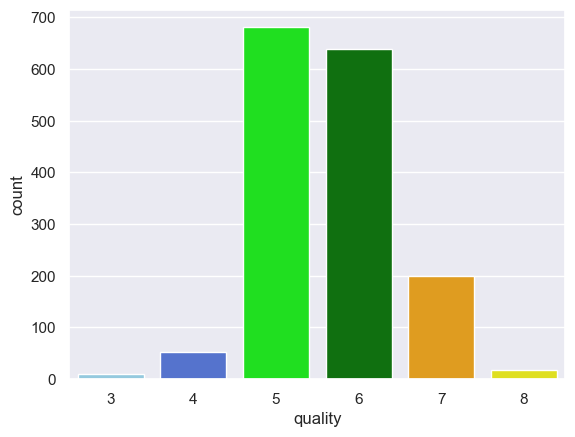

In [64]:
sns.countplot(data=wine_data, x='quality', palette=['skyblue', 'royalblue', 'lime', 'green', 'orange', 'yellow' ])

In [65]:
# fixed acidity

In [66]:
fig = px.histogram(wine_data,
                   x = 'fixed_acidity',
                   marginal='box',
                   color_discrete_sequence=['#75A47F'],
                   title = 'fixed acidity')
fig.update_layout(bargap=0.1)
fig.show()

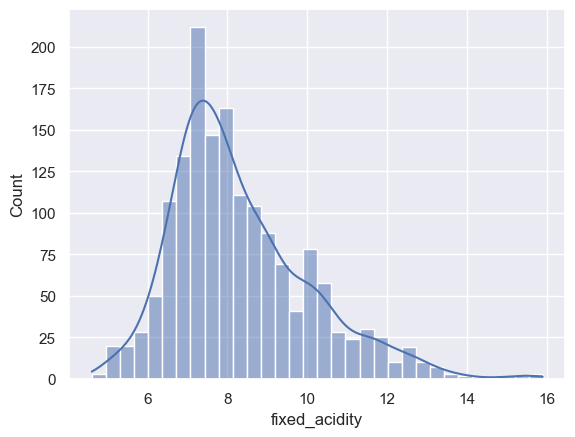

In [67]:
sns.histplot(x= wine_data.fixed_acidity, kde=True, data=wine_data)
plt.show()

In [68]:
wine_data['fixed_acidity'].mean()

8.31963727329581

### Bivariate Analysis

## skewness measure

In [69]:
pd.DataFrame.from_dict(dict(
    {
        'fixed_acidity':wine_data.fixed_acidity.skew(), 
        'volatile_acidity': wine_data.volatile_acidity.skew(), 
        'citric_acid': wine_data.citric_acid.skew(),
        'residual_sugar': wine_data.residual_sugar.skew(),
        'chlorides': wine_data.chlorides.skew(),
        'free_sulfur_dioxide': wine_data.free_sulfur_dioxide.skew(),
        'total_sulfur_dioxide': wine_data.total_sulfur_dioxide.skew(),
        'density': wine_data.density.skew(),
        'pH': wine_data.pH.skew(),
        'sulphates': wine_data.sulphates.skew(),
        'alcohol': wine_data.alcohol.skew(),
    }), orient='index', columns=['Skewness'])

,Skewness
fixed_acidity,0.982751
volatile_acidity,0.671593
citric_acid,0.318337
residual_sugar,4.540655
chlorides,5.680347
free_sulfur_dioxide,1.250567
total_sulfur_dioxide,1.515531
density,0.071288
pH,0.193683
sulphates,2.428672


### Correleation Martrix 

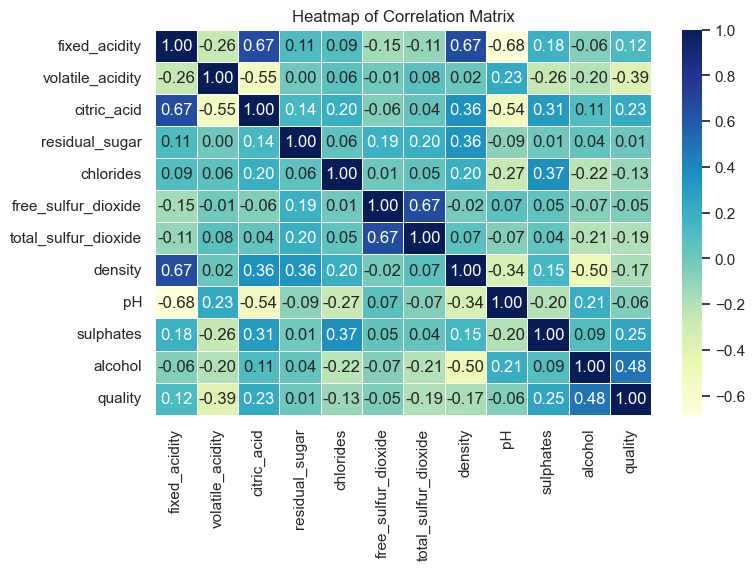

In [70]:
wine_corr  = wine_data.select_dtypes(include=np.number)
correlation_matrix = wine_corr.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

## Feature Engineering

In [72]:
wine_df = wine_data.copy()

In [73]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

1. classifying the quality attribute to good/1  and bad/0
2. considering wine quality 7 and above as good and rest as bad

In [75]:
wine_df['quality_1'] = [1 if x >=7 else 0 for x in wine_df['quality']]

separating independent and dependent attributes

In [80]:
X = wine_df.drop(['quality', 'quality_1'], axis=1)
Y = wine_df['quality_1']